In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df=pd.read_csv('mobile.csv')

In [47]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [48]:
df['Purchased'].unique()

array([0, 1])

In [49]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [50]:
purchased_data = df[["Age","EstimatedSalary","Purchased"]][df["Purchased"]==1]
purchased_data

,Age,EstimatedSalary,Purchased
7,32,150000,1
16,47,25000,1
17,45,26000,1
18,46,28000,1
19,48,29000,1
...,...,...,...
393,60,42000,1
395,46,41000,1
396,51,23000,1
397,50,20000,1


In [51]:
not_purchased_data = df[["Age","EstimatedSalary","Purchased"]][df["Purchased"]==0]
not_purchased_data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
377,42,53000,0
380,42,64000,0
387,39,71000,0
394,39,59000,0


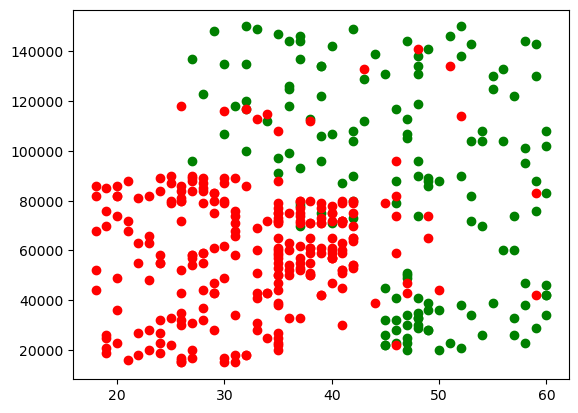

In [52]:
plt.scatter(purchased_data["Age"],purchased_data["EstimatedSalary"],c="green")
plt.scatter(not_purchased_data["Age"],not_purchased_data["EstimatedSalary"],c="red")

In [53]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [54]:
df["EstimatedSalary"].max()

150000

In [55]:
df["EstimatedSalary"].min()

15000

In [56]:
df["Age"].max()

60

In [57]:
df["Age"].min()

18

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_to_scale=["Age","EstimatedSalary"]
scaled_values = scaler.fit_transform(df[features_to_scale])

In [59]:
df["norm_age"] = scaled_values[:,0]
df["norm_salary"] = scaled_values[:,1]

In [60]:
df

,Age,EstimatedSalary,Purchased,norm_age,norm_salary
0,19,19000,0,0.023810,0.029630
1,35,20000,0,0.404762,0.037037
2,26,43000,0,0.190476,0.207407
3,27,57000,0,0.214286,0.311111
4,19,76000,0,0.023810,0.451852
...,...,...,...,...,...
395,46,41000,1,0.666667,0.192593
396,51,23000,1,0.785714,0.059259
397,50,20000,1,0.761905,0.037037
398,36,33000,0,0.428571,0.133333


In [61]:
x=df[["norm_age","norm_salary"]]
y=df["Purchased"]

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2 ,random_state=51)
print(f"shape of X_train {x_train.shape}")
print(f"shape of X_test {x_test.shape}")
print(f"shape of y_train {y_train.shape}")
print(f"shape of y_test {y_test.shape}")

shape of X_train (320, 2)
shape of X_test (80, 2)
shape of y_train (320,)
shape of y_test (80,)


In [65]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,metric="euclidean")
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')